<a href="https://colab.research.google.com/github/kopaprin/association_network/blob/master/association_to_Tableau.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import os
from google.colab import drive
drive.mount('/content/drive')
os.chdir("/content/drive/My Drive/work/200503_association")


import random
random.seed(246) 
import numpy
numpy.random.seed(4812)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [53]:
import pandas as pd

edge_df = pd.read_csv("output.csv")
# 以下、support , confidence , liftを計算します。
edge_df["support"] = edge_df["AandB"] / edge_df["N"]
edge_df["confidence"] = edge_df["AandB"] / edge_df["A"]
edge_df["lift"] = edge_df["confidence"] / ( edge_df["B"] / edge_df["N"] )
# supportが低い組み合わせを除外します。
edge_df = edge_df[edge_df["AandB"]>3]

display(edge_df)
print(edge_df.shape)

,from-to,source_item,source_name,target_item,target_name,AandB,A,B,N,support,confidence,lift
84,Academy Dinosaur - Daisy Menagerie,Academy Dinosaur,Documentary,Daisy Menagerie,Sci-Fi,4,23,16,599,0.006678,0.173913,6.510870
125,Academy Dinosaur - English Bulworth,Academy Dinosaur,Documentary,English Bulworth,Sci-Fi,4,23,29,599,0.006678,0.173913,3.592204
177,Academy Dinosaur - High Encino,Academy Dinosaur,Documentary,High Encino,Horror,4,23,22,599,0.006678,0.173913,4.735178
825,Adaptation Holes - Titans Jerk,Adaptation Holes,Documentary,Titans Jerk,Sci-Fi,4,12,28,599,0.006678,0.333333,7.130952
903,Affair Prejudice - Canyon Stock,Affair Prejudice,Horror,Canyon Stock,Animation,5,22,19,599,0.008347,0.227273,7.165072
...,...,...,...,...,...,...,...,...,...,...,...,...
323082,Zorro Ark - Roses Treasure,Zorro Ark,Comedy,Roses Treasure,Sports,5,30,27,599,0.008347,0.166667,3.697531
323098,Zorro Ark - Seabiscuit Punk,Zorro Ark,Comedy,Seabiscuit Punk,Sports,4,30,25,599,0.006678,0.133333,3.194667
323104,Zorro Ark - Shootist Superfly,Zorro Ark,Comedy,Shootist Superfly,Drama,4,30,24,599,0.006678,0.133333,3.327778
323134,Zorro Ark - Storm Happiness,Zorro Ark,Comedy,Storm Happiness,Animation,4,30,29,599,0.006678,0.133333,2.754023


(2192, 12)


In [0]:
edge_df_lift = edge_df[["source_item","target_item","confidence"]]
col_name = ["source", "target","weight"]
edge_df_lift.columns = col_name


import networkx as nx

def make_network(df):
  G = nx.from_pandas_edgelist(df,edge_attr=True)
  pos = nx.spring_layout(G)
  edges = G.edges()
  weights = [G[u][v]['weight'] for u,v in edges]
  nx.draw(G, pos, edges=edges, width=weights, node_size=10, node_color="c",with_labels=False)

  node = []
  x = []
  y = []
  for k,v in pos.items():
    node.append(k)
    x.append(v[0])
    y.append(v[1])

  node_df=pd.DataFrame({
      "item":node,
      "X":x,
      "Y":y
  })

  return node_df 

node_df = make_network(edge_df_lift)

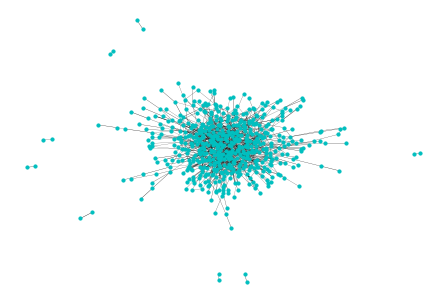

In [0]:
result_df_1 = pd.merge(edge_df_lift,node_df,how="left",left_on="source",right_on="item")
result_df_2 = pd.merge(edge_df_lift,node_df,how="left",left_on="target",right_on="item")
result_df = pd.concat([result_df_1, result_df_2])
result_df["edge_name"] = result_df["source"] + "_" + result_df["target"]

In [0]:
edge_df.to_csv("edge_df.csv",index=False)
node_df.to_csv("node_df.csv",index=False)
result_df.to_csv("result_df.csv",index=False)

In [59]:
display(edge_df)

,from-to,source_item,source_name,target_item,target_name,AandB,A,B,N,support,confidence,lift
84,Academy Dinosaur - Daisy Menagerie,Academy Dinosaur,Documentary,Daisy Menagerie,Sci-Fi,4,23,16,599,0.006678,0.173913,6.510870
125,Academy Dinosaur - English Bulworth,Academy Dinosaur,Documentary,English Bulworth,Sci-Fi,4,23,29,599,0.006678,0.173913,3.592204
177,Academy Dinosaur - High Encino,Academy Dinosaur,Documentary,High Encino,Horror,4,23,22,599,0.006678,0.173913,4.735178
825,Adaptation Holes - Titans Jerk,Adaptation Holes,Documentary,Titans Jerk,Sci-Fi,4,12,28,599,0.006678,0.333333,7.130952
903,Affair Prejudice - Canyon Stock,Affair Prejudice,Horror,Canyon Stock,Animation,5,22,19,599,0.008347,0.227273,7.165072
...,...,...,...,...,...,...,...,...,...,...,...,...
323082,Zorro Ark - Roses Treasure,Zorro Ark,Comedy,Roses Treasure,Sports,5,30,27,599,0.008347,0.166667,3.697531
323098,Zorro Ark - Seabiscuit Punk,Zorro Ark,Comedy,Seabiscuit Punk,Sports,4,30,25,599,0.006678,0.133333,3.194667
323104,Zorro Ark - Shootist Superfly,Zorro Ark,Comedy,Shootist Superfly,Drama,4,30,24,599,0.006678,0.133333,3.327778
323134,Zorro Ark - Storm Happiness,Zorro Ark,Comedy,Storm Happiness,Animation,4,30,29,599,0.006678,0.133333,2.754023


In [60]:
display(node_df)

,item,X,Y
0,Academy Dinosaur,-0.231908,-0.068016
1,Daisy Menagerie,-0.352525,-0.094254
2,English Bulworth,-0.045743,-0.117163
3,High Encino,-0.134110,0.047301
4,Adaptation Holes,0.024109,0.340548
...,...,...,...
568,Sons Interview,-0.250606,-0.043771
569,Submarine Bed,0.393344,0.329402
570,Stepmom Dream,0.096522,0.375347
571,Voice Peach,0.366332,0.264511


In [61]:
result_df

,source,target,weight,item,X,Y,edge_name
0,Academy Dinosaur,Daisy Menagerie,0.173913,Academy Dinosaur,-0.231908,-0.068016,Academy Dinosaur_Daisy Menagerie
1,Academy Dinosaur,English Bulworth,0.173913,Academy Dinosaur,-0.231908,-0.068016,Academy Dinosaur_English Bulworth
2,Academy Dinosaur,High Encino,0.173913,Academy Dinosaur,-0.231908,-0.068016,Academy Dinosaur_High Encino
3,Adaptation Holes,Titans Jerk,0.333333,Adaptation Holes,0.024109,0.340548,Adaptation Holes_Titans Jerk
4,Affair Prejudice,Canyon Stock,0.227273,Affair Prejudice,-0.125013,0.266188,Affair Prejudice_Canyon Stock
...,...,...,...,...,...,...,...
2187,Zorro Ark,Roses Treasure,0.166667,Roses Treasure,0.201205,-0.098912,Zorro Ark_Roses Treasure
2188,Zorro Ark,Seabiscuit Punk,0.133333,Seabiscuit Punk,0.188369,-0.121148,Zorro Ark_Seabiscuit Punk
2189,Zorro Ark,Shootist Superfly,0.133333,Shootist Superfly,0.104056,-0.124184,Zorro Ark_Shootist Superfly
2190,Zorro Ark,Storm Happiness,0.133333,Storm Happiness,-0.068992,-0.046146,Zorro Ark_Storm Happiness


In [0]:
item_df = edge_df[["source_item","source_name"]]
item_df = item_df.drop_duplicates()
item_df.to_csv("item_df.csv",index=False)